<a href="https://colab.research.google.com/github/aryanpatel99/GEN-AI-PRACTICE/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Load EMNIST Letters (Directly slicing the dataset strings)
# batch_size=-1 loads the entire requested slice as a single Tensor/Array
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = tfds.load(
'emnist/letters',
split=['train[:20000]', 'test[:5000]'],
batch_size=-1,
as_supervised=True
)

# 2. Vectorized Preprocessing (No loops = Much faster)
# Convert to numpy, flatten (N, 28, 28, 1) -> (N, 784), and normalize
X_train = tfds.as_numpy(X_train_raw).reshape(-1, 784) / 255.0
X_test = tfds.as_numpy(X_test_raw).reshape(-1, 784) / 255.0

# Adjust labels (1-26 -> 0-25)
y_train = tfds.as_numpy(y_train_raw) - 1
y_test = tfds.as_numpy(y_test_raw) - 1

label_map = {i: chr(ord('A') + i) for i in range(26)}

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.4WDLCK_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.4WDLCK_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.
Train shape: (20000, 784), Test shape: (5000, 784)


In [3]:
# --- 1. Logistic Regression (Basic Linear ML) ---
print("Training Logistic Regression...")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr_model.predict(X_test))
lr_acc

Training Logistic Regression...


0.671

In [5]:
# --- 3. Sequential ANN (Neural Network) ---
print("Training Sequential ANN...")
ann_model = Sequential([
Dense(256, activation='relu', input_shape=(784,)),
Dropout(0.2),
Dense(128, activation='relu'),
Dense(26, activation='softmax')
])
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1)

Training Sequential ANN...
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4134 - loss: 2.0820
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7200 - loss: 0.9396
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7842 - loss: 0.7107
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8230 - loss: 0.5748
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8404 - loss: 0.4993
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8568 - loss: 0.4505
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8727 - loss: 0.3914
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8818 - loss: 0.3577
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8893 - loss: 0.3374
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8989 - loss: 0.2979
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8999 - loss: 0.2894
Epo

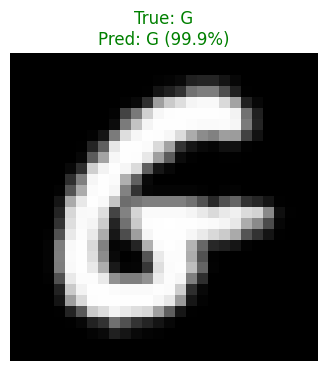

In [8]:
def predict_random_image():
# Pick a random index from test set
  idx = np.random.randint(0, len(X_test))
  test_img = X_test[idx]
  true_label = y_test[idx]

  # ANN Prediction
  # Reshape for the model: (1 sample, 784 features)
  prediction_probs = ann_model.predict(test_img.reshape(1, 784), verbose=0)
  predicted_idx = np.argmax(prediction_probs)
  confidence = np.max(prediction_probs) * 100

  # Visualization
  plt.figure(figsize=(4,4))
  # Note: EMNIST images are transposed, .T fixes it
  plt.imshow(test_img.reshape(28, 28).T, cmap='gray')

  color = 'green' if predicted_idx == true_label else 'red'
  plt.title(f"True: {label_map[true_label]}\nPred: {label_map[predicted_idx]} ({confidence:.1f}%)", color=color)
  plt.axis('off')
  plt.show()

# Run the function
predict_random_image()